##### DATASET

In [1]:
# Salary_Network_Ads.csv
# Location: https://mitu.co.in/dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### READ THE DATA

In [9]:
df = pd.read_csv('dataset/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [10]:
##### Separate the input and output variables


In [11]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [12]:
x.shape

(400, 2)

In [13]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [15]:
set(y)

{0, 1}

In [16]:
np.unique(y)

array([0, 1], dtype=int64)

<Axes: xlabel='Purchased', ylabel='count'>

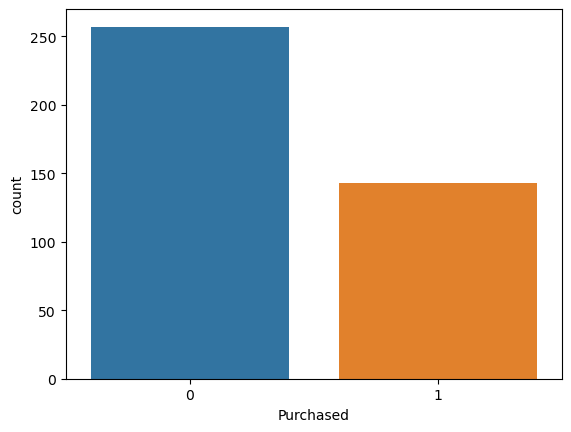

In [18]:
sns.countplot(x=y, palette='tab10')

In [140]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

# Pie chart

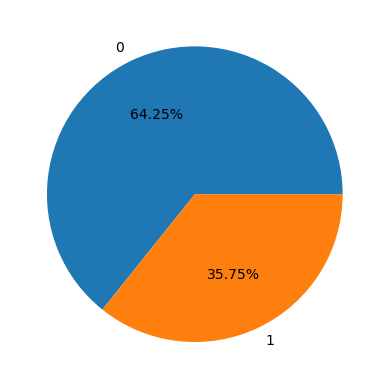

In [141]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

In [142]:
z = df['Gender']

In [143]:
z

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

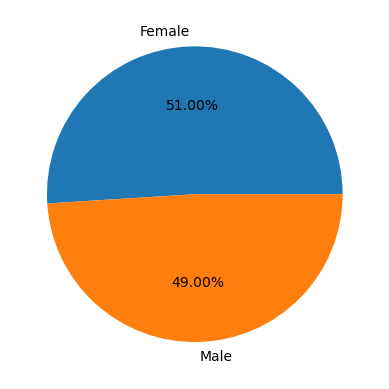

In [144]:
plt.pie(z.value_counts(), labels=z.value_counts().index, autopct='%2.2f%%');

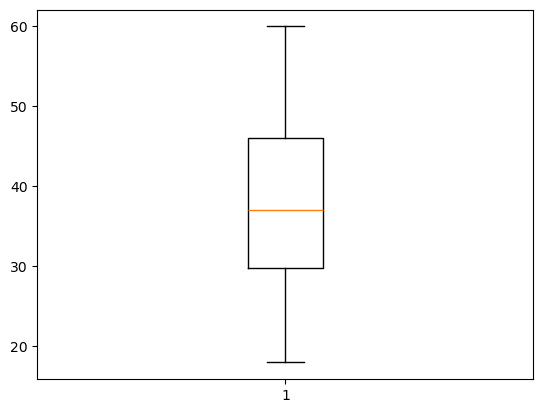

In [145]:
plt.boxplot(df['Age']);

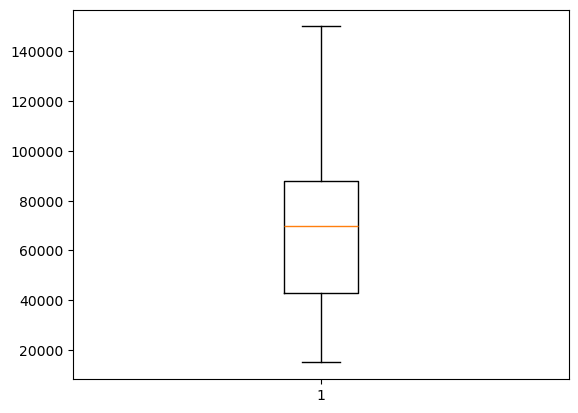

In [146]:
plt.boxplot(df['EstimatedSalary']);

(array([  0.,  12.,  88., 138., 109.,  53.]),
 array([ 0., 10., 20., 30., 40., 50., 60.]),
 <BarContainer object of 6 artists>)

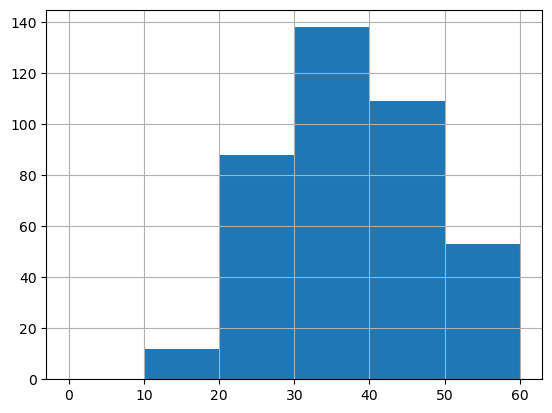

In [147]:
plt.xticks(range(0,61,10))
plt.grid()
plt.hist(df['Age'], range (0,61,10))


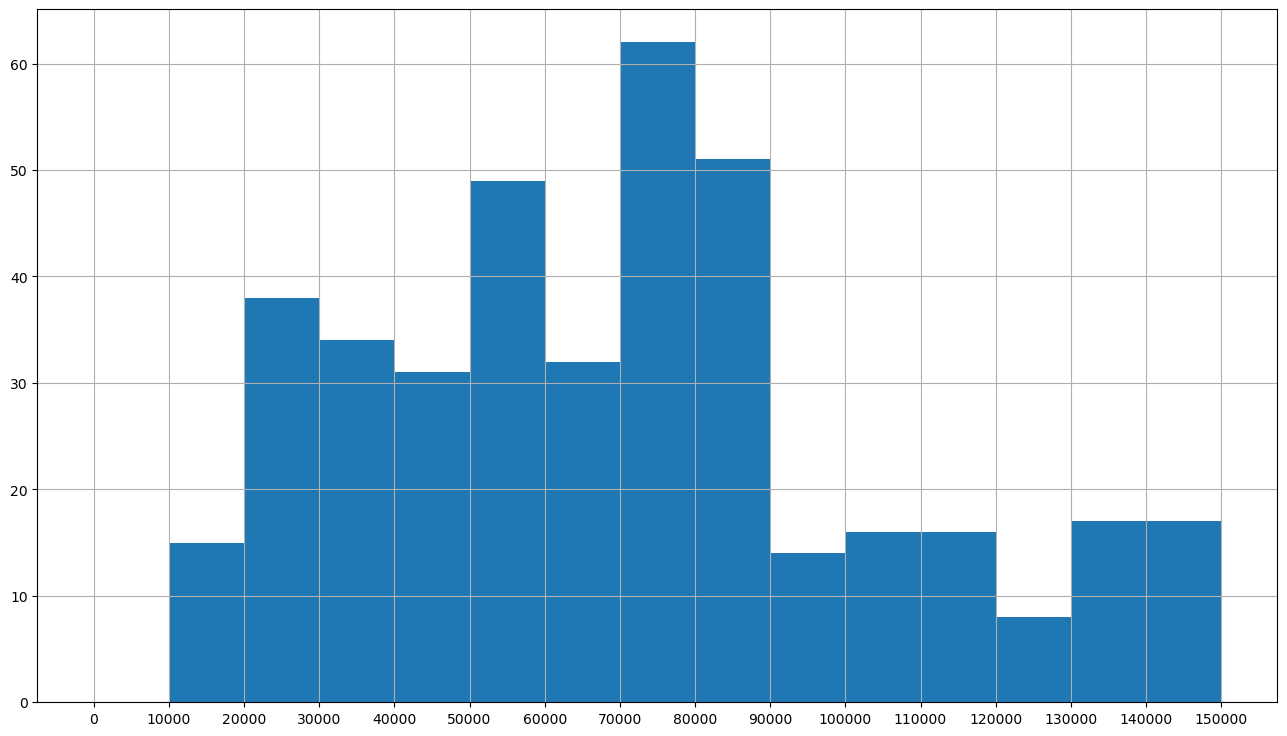

In [148]:
plt.figure(figsize=(16,9))
plt.xticks(range(0,150001,10000))
plt.grid()
plt.hist(df['EstimatedSalary'], range(0,150001,10000));

C:\Users\rajesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


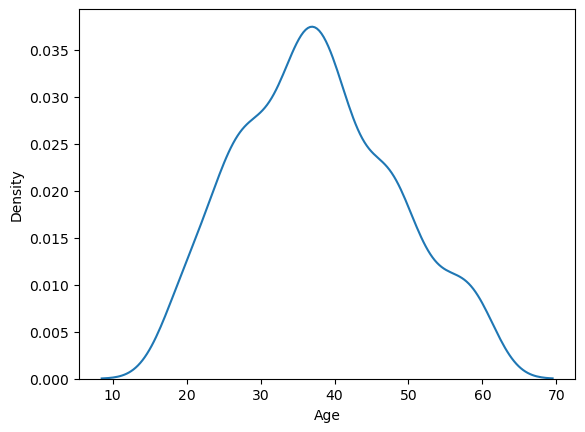

In [149]:
sns.kdeplot(df['Age']);

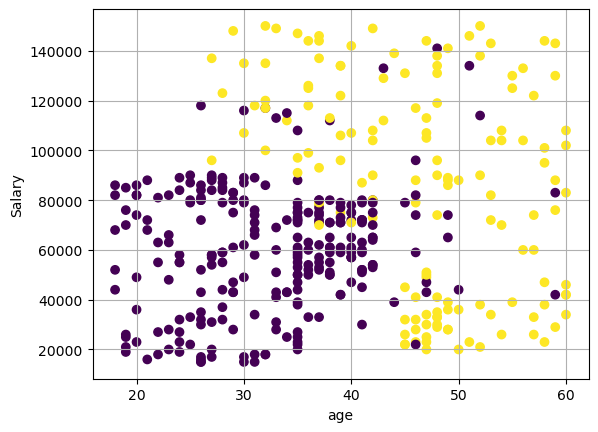

In [150]:
plt.xlabel('age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)

C:\Users\rajesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


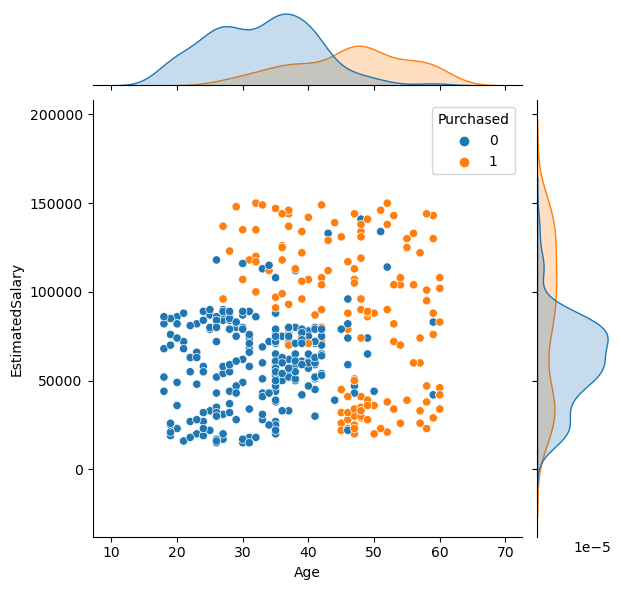

In [151]:
sns.jointplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')

##### Feature Scaling

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [153]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


##### CROSS VALIDATION

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [156]:
x_train.shape

(300, 2)

In [157]:
y_train.shape

(300,)

In [158]:
x_test.shape

(100, 2)

In [159]:
y_test.shape

(100,)

##### BUILD THE MODEL

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
classifier = LogisticRegression()

In [162]:
#train the algorithm
classifier.fit(x_train, y_train)

LogisticRegression()

##### Predict on the unseen data

In [163]:
y_pred = classifier.predict(x_test)

In [164]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [165]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [166]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

##### Performance Evaluation

In [167]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [168]:
print(confusion_matrix(y_test, y_pred))

[[67  1]
 [10 22]]


In [169]:
# 67+22 = 89% ACCURACY OF THE DATA 

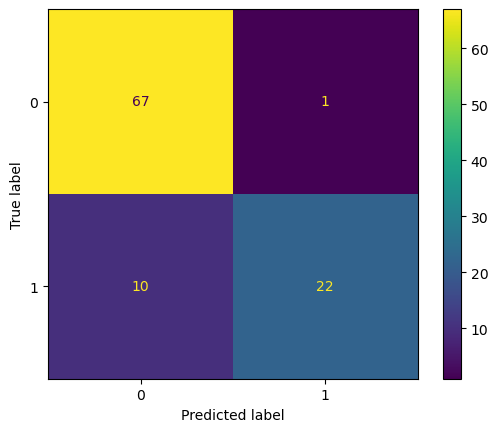

In [170]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [171]:
accuracy_score(y_test, y_pred)

0.89

In [172]:
cm = confusion_matrix(y_test, y_pred)

In [173]:
cm.diagonal().sum() / cm.sum()

0.89

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [175]:
# recall-0 / accuracy of class 0 / sesitivity of algorithm
r0 = 67/68
r0

0.9852941176470589

In [176]:
# recall=1 / accuracy of class 1 / specificity of algorithm
r1 = 22/32
r1

0.6875

In [177]:
# precision-0 / Positive Predictive Value
p0 = 67/77
p0

0.8701298701298701

In [178]:
# Precision-1 / Negative Predictive Value
p1 = 22/23
p1

0.9565217391304348

In [179]:
# F1-score - 0
2 * p0 * r0 / (p0 + r0)

0.9241379310344828

In [180]:
# f1-score - 1
2 * p1 * r1 / (p1 +r1)

0.8

In [181]:
classifier.predict_proba(x_test)

array([[0.79225834, 0.20774166],
       [0.75067874, 0.24932126],
       [0.72745429, 0.27254571],
       [0.8159242 , 0.1840758 ],
       [0.81025799, 0.18974201],
       [0.95014473, 0.04985527],
       [0.92927087, 0.07072913],
       [0.39370124, 0.60629876],
       [0.95662616, 0.04337384],
       [0.54623349, 0.45376651],
       [0.88624081, 0.11375919],
       [0.89780651, 0.10219349],
       [0.7548652 , 0.2451348 ],
       [0.61732595, 0.38267405],
       [0.92568557, 0.07431443],
       [0.63220622, 0.36779378],
       [0.67066218, 0.32933782],
       [0.93447243, 0.06552757],
       [0.08457049, 0.91542951],
       [0.87847026, 0.12152974],
       [0.81877656, 0.18122344],
       [0.15276153, 0.84723847],
       [0.67567934, 0.32432066],
       [0.27289303, 0.72710697],
       [0.96313902, 0.03686098],
       [0.13128108, 0.86871892],
       [0.82800591, 0.17199409],
       [0.83014568, 0.16985432],
       [0.72970907, 0.27029093],
       [0.75480803, 0.24519197],
       [0.

##### PREDICTION ON UNSEEN DATA

In [182]:
new = np.array([[23,45000],[54,148000],[37,63000]])


In [183]:
new

array([[    23,  45000],
       [    54, 148000],
       [    37,  63000]])

In [184]:
classifier.predict(new)

array([1, 1, 1], dtype=int64)

In [185]:
new_scaled = scaler.transform(new)
new_scaled

C:\Users\rajesh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.11904762, 0.22222222],
       [0.85714286, 0.98518519],
       [0.45238095, 0.35555556]])

In [186]:
classifier.predict(new_scaled)

array([0, 1, 0], dtype=int64)

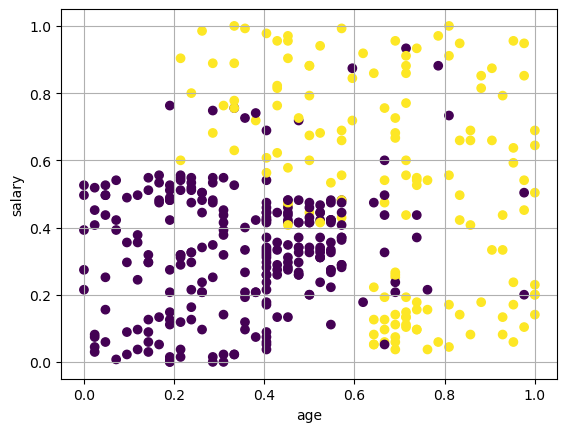

In [187]:
plt.xlabel('age')
plt.ylabel('salary')
plt.grid()
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y)

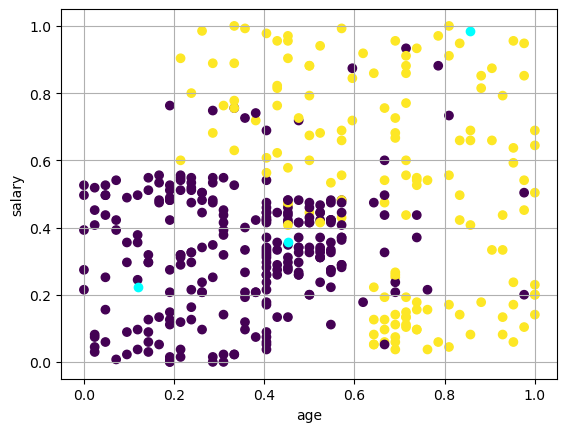

In [190]:
plt.xlabel('age')
plt.ylabel('salary')
plt.grid()
plt.scatter(x_scaled[:,0], x_scaled[:,1] , c = y)
plt.scatter(new_scaled[:,0], new_scaled[:,1] , color = 'cyan')